In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
from IPython.display import clear_output
data = input_data.read_data_sets('data/fashion',one_hot=True,\
                                 source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Extracting data/fashion\train-images-idx3-ubyte.gz
ERROR! Session/line number was not unique in database. History logging moved to new session 616
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


In [44]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5, 1.0, 'Sneaker')

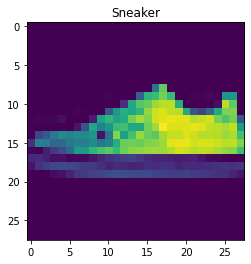

In [45]:
#Data visualization
import random
test_index = random.randint(0,data.test.labels.shape[0])
plt.imshow(data.test.images[test_index].reshape(28,28))
plt.title(label_dict[np.argmax(data.test.labels[test_index])])

In [46]:
#Reshape input data
train_x = data.train.images.reshape(-1,28,28,1)
test_x  = data.train.images.reshape(-1,28,28,1)
print(train_x.shape)

(55000, 28, 28, 1)


![title](img/arch.png)

In [47]:
#Parameters
training_epoch = 150
learning_rate  = 0.00001
batch_size     = 128
n_input        = 28
n_classes      = 10

In [48]:
x = tf.placeholder("float",[None,28,28,1])
y = tf.placeholder("float",[None,n_classes])

In [49]:
def conv2d(x,W,b,strides=1):
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding="SAME")
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

In [50]:
def maxpool2d(x,k=2):
    return tf.nn.max_pool(x,ksize=[1,k,k,1], strides=[1,k,k,1],padding="SAME")

In [51]:
weights = {
    'wc1': tf.Variable(tf.truncated_normal([3,3,1,32],stddev=0.1),name='W0'),
    'wc2': tf.Variable(tf.truncated_normal([3,3,32,64],stddev=0.1),name='W1'),
    'wc3': tf.Variable(tf.truncated_normal([3,3,64,128],stddev=0.1),name='W2'),
    'wd1': tf.Variable(tf.truncated_normal([4*4*128,128],stddev=0.1),name='W3'),
    'out': tf.Variable(tf.truncated_normal([128,n_classes],stddev=0.1),name='W4')
}
biases = {
    'bc1': tf.Variable(tf.truncated_normal([32],stddev=0.1),name='b0'),
    'bc2': tf.Variable(tf.truncated_normal([64],stddev=0.1),name='b1'),
    'bc3': tf.Variable(tf.truncated_normal([128],stddev=0.1),name='b2'),
    'bd1': tf.Variable(tf.truncated_normal([128],stddev=0.1),name='b3'),
    'out': tf.Variable(tf.truncated_normal([n_classes],stddev=0.1),name='b4')
}

In [52]:
#1st CNN Layer
conv1 = conv2d(x,weights['wc1'],biases['bc1'])
conv1 = maxpool2d(conv1,k=2)    

In [53]:
#2nd CNN Layer
conv2 = conv2d(conv1,weights['wc2'],biases['bc2'])
conv2 = maxpool2d(conv2,k=2)

In [54]:
#3rd CNN Layer
conv3 = conv2d(conv2,weights['wc3'],biases['bc3'])
conv3 = maxpool2d(conv3,k=2)  

In [55]:
#Dense Layer  
fc1 = tf.reshape(conv3,[-1,weights['wd1'].get_shape().as_list()[0]])
fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
fc1 = tf.nn.relu(fc1)

In [56]:
#Output Layer
out = tf.add(tf.matmul(fc1,weights['out']),biases['out'])

In [57]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out,labels=y))
optimizer =  tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [58]:
correct_prediction = tf.equal(tf.argmax(out, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

epoch 149 accuracy 89.60000276565552 %


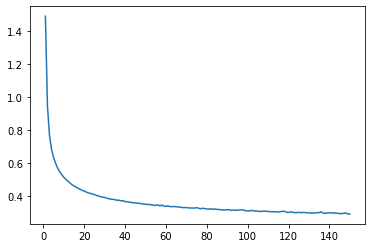

In [60]:
init = tf.global_variables_initializer()
test_accuracy = []
error_list = []
epoch_list = []
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epoch):
        
        total_batch = int(data.train.num_examples / batch_size)             
        for i in range(total_batch):                     
            batch_xs, batch_ys = data.train.next_batch(batch_size)
            batch_xs_reshape = batch_xs.reshape(-1,28,28,1)            
            sess.run(optimizer,feed_dict={
                x: batch_xs_reshape,
                y:batch_ys
            })
        error_list.append(sess.run(loss,feed_dict={
            x: data.test.images.reshape(-1,28,28,1),
            y: data.test.labels
        }))
        
        test_accuracy.append(sess.run(accuracy,feed_dict={
            x: data.test.images.reshape(-1,28,28,1),
            y: data.test.labels
            
        }))
        epoch_list.append(epoch+1)
        clear_output(wait=True)
        print("epoch",epoch,"accuracy",test_accuracy[epoch]*100,"%")
        plt.plot(epoch_list,error_list)
        plt.show()
        
    i = 4927
    temp = data.test.images[i].reshape(-1,28,28,1)    
    output_cnn1 = sess.run(conv1,feed_dict={
        x:temp
    })
    
    output_cnn2 = sess.run(conv2,feed_dict={
        x:temp
    })
    
    output_cnn3 = sess.run(conv3,feed_dict={
        x:temp
    })
    
        